In [ ]:
%cd "Paciente 17"

In [2]:
import pandas as pd

test = pd.read_csv('Teste.csv')
train = pd.read_csv('Treino.csv')

label_column = test.columns[-1]

Y_test = test[label_column]
Y_train = train[label_column]

X_test = test.drop(columns=label_column)
X_train = train.drop(columns=label_column)

In [6]:
from sklearn.linear_model import LinearRegression


model = LinearRegression().fit(X_train,Y_train)
predictions = model.predict(X_test)

In [7]:
import plotly.express as px


px.histogram(predictions, x=0, histnorm='percent')

In [ ]:
pred_label = pd.DataFrame({'label': Y_test, 'regression': predictions}).reset_index()
pred_label['label'] = pred_label['label'].map({1: 'Normal', -1: 'Extra Sistólico'})
pred_label['prediction'] = pred_label['regression'].apply(lambda num: num > 0).map({True: 'Normal', False: 'Extra Sistólico'})
pred_label['evaluation'] = (pred_label['label'] == pred_label['prediction']).map({True: 'Certo', False: 'Errado'})
pred_label

In [9]:
import plotly.graph_objects as go

fig = px.scatter(
    pred_label,
    x='index',
    y='regression',
    color='label',
    symbol='evaluation',
    color_discrete_map={'Normal': 'darkolivegreen', 'Extra Sistólico': 'red'},
    symbol_map={'Certo': 'circle', 'Errado': 'x'},
)
fig.update_traces(marker={'size': 13})
fig.add_shape(type="line", line_dash="dash", x0=0, x1=pred_label.shape[0], y0=0, y1=0, line_color='darkblue')

In [10]:
# Tomando positivo como a label "1"

false_negative = Y_test[(Y_test == 1) & (predictions  <  0)].index
false_positive = Y_test[(Y_test == -1) & (predictions > 0)].index

In [11]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff


labels = ['Normal', 'Extra Sistólico']
conf_matrix = confusion_matrix(pred_label['label'], pred_label['prediction'], labels = ['Normal', 'Extra Sistólico'])

ff.create_annotated_heatmap(conf_matrix, x=labels, y=labels, showscale=True, colorscale="tempo")

In [12]:
from sklearn.metrics import classification_report

print(classification_report(pred_label['label'], pred_label['prediction']))

                 precision    recall  f1-score   support

Extra Sistólico       0.76      0.73      0.75        26
         Normal       0.93      0.94      0.93        99

       accuracy                           0.90       125
      macro avg       0.84      0.84      0.84       125
   weighted avg       0.89      0.90      0.90       125



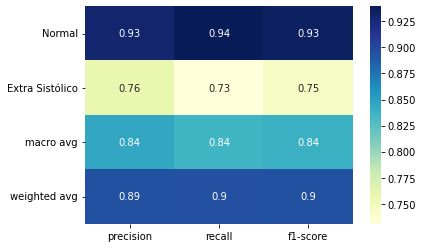

In [13]:
from sklearn.metrics import classification_report
import seaborn as sns


clf_report = classification_report(pred_label['label'], pred_label['prediction'], output_dict=True)
col_order = ['Normal', 'Extra Sistólico', 'macro avg', 'weighted avg', 'accuracy']
clf_report = pd.DataFrame(clf_report)[col_order].drop(columns=['accuracy']).iloc[:-1, :].T

sns.heatmap(clf_report, annot=True, cmap="YlGnBu")